In [22]:
def generate_non_stationary_data(generate_function, length: int, data_path:str):
    result = generate_function(length)
    print(f"result: {result}")
    df = pd.read_csv('dataset/ETT-small/ETTm2.csv')
    cut_df = df[:length]
    cut_df['OT'] = result
    cut_df = cut_df[['date', 'OT']]
    cut_df.to_csv(data_path, index=False) #'dataset/self_made/sin_on_line_10k.csv'
    return cut_df

In [23]:
def autoro_generator(length: int):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as pyplot
    np.random.seed(42)
    # Generate a time series with strong autocorrelations using an AR(1) model
    # AR(1) model: X_t = phi * X_{t-1} + epsilon, where phi is close to 1 for strong autocorrelation
    phi = 0.2
    epsilon = np.random.randn(length)
    time_series = np.zeros(length)
    for t in range(1, length):
        time_series[t] = phi * time_series[t-1] + 10*epsilon[t]
    # Plot the series
    pyplot.figure(figsize=(12, 6))
    pyplot.plot(time_series)
    pyplot.title('Time Series with Strong Autocorrelation')
    pyplot.xlabel('Time')
    pyplot.ylabel('Value')
    pyplot.grid(True)
    pyplot.show()
    return time_series

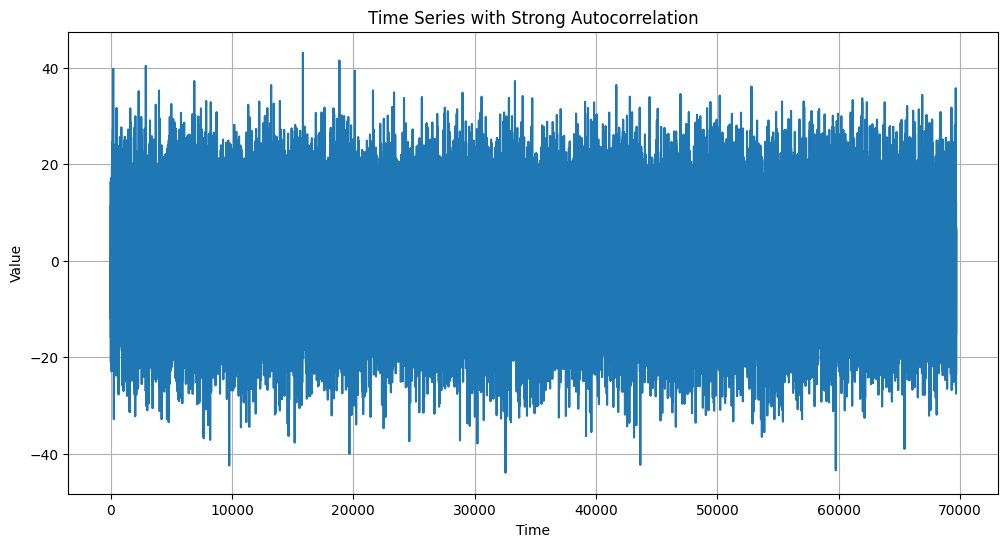

result: [  0.          -1.38264301   6.20035678 ...   0.2940124    6.95217314
 -15.20363421]


In [24]:
result = generate_non_stationary_data(autoro_generator, 69680, 'dataset/self_made/auto_correlation.csv')

In [25]:
result

,date,OT
0,2016-07-01 00:00:00,0.000000
1,2016-07-01 00:15:00,-1.382643
2,2016-07-01 00:30:00,6.200357
3,2016-07-01 00:45:00,16.470370
4,2016-07-01 01:00:00,0.952540
...,...,...
69675,2018-06-26 18:45:00,-23.578142
69676,2018-06-26 19:00:00,-17.707226
69677,2018-06-26 19:15:00,0.294012
69678,2018-06-26 19:30:00,6.952173
